# Background & Problem Statement
Sebuah perusahaan yang bergerak di bidang digital entertainment sedang dalam proses developing sebuah **video-based sharing website**. Perusahaan tersebut memakai sebuah website ternama, **YouTube**, sebagai basis dalam developing website mereka.

Dalam proses development nya, perusahaan ingin mengetahui:  
* <b>Faktor-faktor apa saja yang membuat sebuah video itu menjadi trending ?</b>  
* <b>Bagaimana system menentukan apakah video tersebut trending atau tidak ?</b>  
* <b>Video seperti apa yg masuk ke dalam kategori trending ?</b>

Informasi ini akan membantu perusahaan untuk mebangun website dengan fondasi yg solid dan diharapkan dapat mengatur strategi untuk mempromosikan platform mereka dan menarik berbagai macam viewer dan content creator dengan cepat.

Sebagai seorang **data analyst**, kita akan mencoba menjawab pertanyaan-pertanyaan diatas.

Perusahaan sudah menyediakan sebuah dataset video trending pada YouTube yang dapat diakses [disini](https://www.kaggle.com/datasets/datasnaek/youtube-new).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import json

from matplotlib import pyplot as plt

Dataset ini berisikan tentang video-video apa saja yang masuk dalam ketegori trending pada 14 November 2017 s/d 14 Juni 2018. Ada 16 kolom di dalam dataset ini, yaitu:  

* video_id : ID unik untuk tiap video
* trending_date : Mengindikasikan bahwa video tersebut masuk dalam ketegori trending pada tanggal tersebut (YY.DD.MM)
* title : Judul dari video tersebut
* channel_title : Channel yang mem-publish video tersebut
* category_id : Kategori dari video tersebut
* publish_time : Mengindikasikan kapan video tersebut di publish
* tags : Kumpulan dari label-label yang diberikan publisher kepada video tersebut
* views : Total dari penonton pada tanggal pada saat video tersebut trending
* likes : Total dari penonton yang memberikan **like** pada tanggal pada saat video tersebut trending
* dislikes : Total dari penonton yang memberikan **dislike** pada tanggal pada saat video tersebut trending
* comment_count : Total dari penonton yang memberikan **comment** pada tanggal pada saat video tersebut trending
* thumbnail_link : Link untuk menunjuk thumbnail dari video tersebut
* comments_disabled : Mengindikasikan apakah penonton dapat memberikan comment pada video tersebut
* ratings_disabled : Mengindikasikan apakah sebuah video restrict oleh ratings
* video_error_or_removed : Mengindikasikan apakah video tersebut mengalami kendala atau dihapus
* description : Deskripsi yang diberikan publisher kepada video tersebut

Berikut 5 baris teratas dan terbawah dari dataset ini.

In [2]:
df=pd.read_csv('USvideos.csv',parse_dates=['publish_time'])
# perse_dates disini digunakan utk langsung mengubah dtype dari kolom publish_time langsung menjadi datetime64
display(df.head(),df.tail())

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04+00:00,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06+00:00,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22+00:00,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04+00:00,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...
40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17 17:09:38+00:00,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umum dari dataset ini.

In [3]:
df.shape
# Jumlah baris dan kolom di dataset df adalah 40949 dan 16

(40949, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40949 non-null  object             
 1   trending_date           40949 non-null  object             
 2   title                   40949 non-null  object             
 3   channel_title           40949 non-null  object             
 4   category_id             40949 non-null  int64              
 5   publish_time            40949 non-null  datetime64[ns, UTC]
 6   tags                    40949 non-null  object             
 7   views                   40949 non-null  int64              
 8   likes                   40949 non-null  int64              
 9   dislikes                40949 non-null  int64              
 10  comment_count           40949 non-null  int64              
 11  thumbnail_link          40949 non-null  o

In [5]:
pd.set_option('display.float_format',lambda x : '%.f' % x)
# kita set_option agar tidak memakai scientific notation
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949,40949,40949,40949,40949
mean,20,2360785,74267,3711,8447
std,8,7394114,228885,29030,37430
min,1,549,0,0,0
25%,17,242329,5424,202,614
50%,24,681861,18091,631,1856
75%,25,1823157,55417,1938,5755
max,43,225211923,5613827,1674420,1361580


In [6]:
df.describe(include='object')

,video_id,trending_date,title,channel_title,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40379
unique,6351,205,6455,2207,6055,6352,6901
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,30,200,30,203,1535,30,58


In [7]:
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [8]:
df.duplicated().sum()
# Terdapat 48 baris data yg duplikat

48

Secara umum, kita bisa melihat bahwa:
* Dataset USvideos ini memiliki 16 kolom dan 40.949 baris.
* Kolom `description` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN. Kita tidak akan menggunakan kolom `description`, sehingga tidak ada action yang harus dilakukan.
* Pada kolom `trending_date`, dapat diperhatikan bahwa dtpye nya masih berupa object dan juga kita tidak dilakukan parse_date diawal karena format date nya yg salah. Kita akan memanipulasi kolom ini sehingga format dtype nya menjadi datetime yg dinginkan.
* Demikian pula dengan `publish_time`, dapat diperhatikan bahwa format nya juga salah. Kita akan memanipulasi kolom ini sehingga format dtype nya menjadi datetime yg dinginkan.
* Kolom `category_id` memiliki data kategorikal berupa angka 1 sampai dengan 16, angka-angka tersebut tidak menjelaskan kategori dari video tersebut. Kita akan angka-angka tersebut menjadi kategori sesungguhnya dengan json file yg sudah disediakan.
* Terdapat 48 data duplikat dari seluruh data kita, kita akan drop data duplikat tersebut karena jumlah data duplikat tersebut tidak relevan.
* Dari data yg sudah disediakan, kita dapat mencari tahu beberapa data berikutnya, contoh: umur dari video tersebut, kecepatan views per hari dari video tersebut, dan hari apa video tersebut di publish. Kita akan membuat kolom baru untuk data-data tambahan tersebut.

Yang pertama kita lakukan adalah mengubah semua `category_id` dari seluruh video dari angka menjadi kategori yang sesungguh nya. Sudah terdapat file .json yg berisikan nama dari tiap kategori. Mari kita read file .json kita terlebih dahulu.

In [9]:
json=json.load(open('US_category_id.json'))
json

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

Dapat kita lihat jika `category_id` nya 1, maka nama dari kategorinya adalah **Film & Animation**. Kedua hal tersebut dapat kita lihat pada 'id' dan 'title'. Sekarang kita akan menyimpan seluruh `category_id` dan nama kategorynya dalam sebuah dictionary dan akan kita mapping ke dalam dataset kita, yang nantinya akan kita simpan di kolom bernama `category_name`.

In [10]:
dict={}
for i in json['items']:
    dict[int(i["id"])]=i["snippet"]["title"]
df['category_name']=df['category_id'].map(dict)
df[['title','category_id','category_name']]
# Berikut hasil dari mapping untuk category_name

,title,category_id,category_name
0,WE WANT TO TALK ABOUT OUR MARRIAGE,22,People & Blogs
1,The Trump Presidency: Last Week Tonight with J...,24,Entertainment
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",23,Comedy
3,Nickelback Lyrics: Real or Fake?,24,Entertainment
4,I Dare You: GOING BALD!?,24,Entertainment
...,...,...,...
40944,The Cat Who Caught the Laser,15,Pets & Animals
40945,True Facts : Ant Mutualism,22,People & Blogs
40946,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,24,Entertainment
40947,How Black Panther Should Have Ended,1,Film & Animation


Setelah `category_name`, berikutnya adalah merubah `trending_date` dan `publish_time`.  
Untuk `publish_time`, dapat dilihat bahwa format nya berupa YYYY-MM-DD HH:MM:SS+00:00. Sekarang kita akan mengubah formatnya menjadi YYYY-MM-DD saja dan menyimpannya kembali pada `publish_time`.

In [11]:
df['publish_time']=df['publish_time'].dt.date
df['publish_time']=pd.to_datetime(df['publish_time'])
df['publish_time']
# Format sudah berubah menjadi YYYY-MM-DD

0       2017-11-13
1       2017-11-13
2       2017-11-12
3       2017-11-13
4       2017-11-12
           ...    
40944   2018-05-18
40945   2018-05-18
40946   2018-05-18
40947   2018-05-17
40948   2018-05-17
Name: publish_time, Length: 40949, dtype: datetime64[ns]

Untuk `trending_date`, format yang saat ini dipakai adalah YYYY-DD-MM. Sekarang kita akan membuat formatnya sama seperti `publish_time` yaitu YYYY-MM-DD, lalu akan kita simpan kembali di kolom `trending_date`.

In [12]:
split=df['trending_date'].str.split('.',expand=True)
df['trending_date']=split[2]+'/'+split[1]+'/'+split[0]
df['trending_date']=pd.to_datetime(df['trending_date'])
df['trending_date']
# Format sudah berubah menjadi YYYY-MM-DD

0       2017-11-14
1       2017-11-14
2       2017-11-14
3       2017-11-14
4       2017-11-14
           ...    
40944   2018-06-14
40945   2018-06-14
40946   2018-06-14
40947   2018-06-14
40948   2018-06-14
Name: trending_date, Length: 40949, dtype: datetime64[ns]

Untuk data duplicate, kita akan langsung saja gunakan .drop_duplicates karena total dari data tersebut sangat kecil (0.1%).

In [13]:
df=df.drop_duplicates()
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


# Data Analysis

Kita sudah melakukan tahap _data cleaning_. Sekarang mari kita analysis mengunakan statistic dan visualisasi untuk menjawab pertanyaan-pertanyaan yg ditanyakan oleh perusahaan, yaitu:
* <b>Faktor-faktor apa saja yang membuat sebuah video itu menjadi trending ?</b>  
* <b>Bagaimana system menentukan apakah video tersebut trending atau tidak ?</b>  
* <b>Video seperti apa yg masuk ke dalam kategori trending ?</b>

Untuk pertanyaan **faktor-faktor apa saja yang membuat sebuah video itu menjadi trending**, kita dapat mengambilnya dari website YouTube itu sendiri. Berikut adalah penjelasan tentang apa yg menentukan sebuah video yg diambil langsung dari website YouTube.

---

# Trending on YouTube

### What determines if a video is ranked on Trending?
Amongst the many great new videos on YouTube on any given day, Trending can only show a limited number. Trending aims to surface videos that:

* Are appealing to a wide range of viewers
* Are not misleading, clickbaity or sensational
* Capture the breadth of what’s happening on YouTube and in the world
* Showcase a diversity of creators
* Ideally, are surprising or novel

Trending aims to balance all of these considerations. To achieve this, Trending considers many signals, including (but not limited to):

* View count
* How quickly the video is generating views (i.e. “temperature”)
* Where views are coming from, including outside of YouTube
* The age of the video
* How the video performs compared to other recent uploads from the same channel

We combine these signals to produce a list of videos that showcases what’s happening on YouTube, while being relevant to our viewers and reflective of the content on the platform. This means that the video with the highest view count on a given day may not be #1 on Trending, and videos with more views may be shown below videos with fewer views.

---

Secara garis besar, ada 5 faktor utama yang menentukan sebuah video tersebut trending atau tidak, yaitu:
* Banyaknya view terhadap video tersebut.
* Seberapa cepat video tersebut mengumpulkan view.
* Dari mana asal view tersebut.
* Umur dari video tersebut.
* Bagaimana performa video tersebut dibandingkan dgn video lain yg di publish oleh channel yg sama.

Kita akan menganalisa lebih dalam faktor-faktor tersebut untuk dapat menjawab pertanyaan **bagaimana system menentukan apakah video tersebut trending**.

# `View` dan Kecepatan View
In general, sebuah video akan menjadi trending ketika ada ledakan besar dalam view nya, dengan demikian kita bisa asumsikan bahwa di hari pertama video tersebut menjadi trending, maka dihari tersebut terjadi ledakan view yg cukup signifikan.  

Dengan teori diatas, kata dapat mencari kecepatan sebuah video dengan membagi total view dari hari itu dibagi dengan usia dari video tersebut, terhitung dari hari pertama video tersebut trending.

In [14]:
# Pertama kita akan membuat kolom baru yg berisikan tanggal pertama sebuah video trending.
# Hal ini dilakukan agar mempermudah kita untuk menghitung umur dari video tersebut semenjak video tersebut trending.
df['1st_trending_date']=df.groupby('video_id')['trending_date'].transform('min')
df['1st_trending_date']

0       2017-11-14
1       2017-11-14
2       2017-11-14
3       2017-11-14
4       2017-11-14
           ...    
40944   2018-05-23
40945   2018-05-21
40946   2018-05-20
40947   2018-06-12
40948   2018-05-20
Name: 1st_trending_date, Length: 40901, dtype: datetime64[ns]

In [15]:
# Berikutnya kita bisa menghitung sudah berapa lama video tersebut trending 
df['trending_age']=((df['trending_date']-df['1st_trending_date'])/np.timedelta64(1,'D')+1).astype('int64')
df['trending_age']

0         1
1         1
2         1
3         1
4         1
         ..
40944    23
40945    25
40946    26
40947     3
40948    26
Name: trending_age, Length: 40901, dtype: int64

In [16]:
# Kemudian, kita bisa melihat speed dari video tersebut dengan cara membagi total view dengan umur trending video tersebut
df['speed']=df['views']/df['trending_age']
df['speed']

0        748374
1       2418783
2       3191434
3        343168
4       2095731
          ...  
40944     73287
40945     42592
40946     41017
40947   1886938
40948    396389
Name: speed, Length: 40901, dtype: float64

In [17]:
# Berikut DataFrame setelah kita tambahkan kolom2 baru tersebut.
# Dapat dilihat pada kolom baru tersbut kapan pertama kali video tersebut trending, sudah berapa lama video tersebut trending, dan kecepatan view dari video tersebut.
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,1st_trending_date,trending_age,speed
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,2017-11-14,1,748374
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,2017-11-14,1,2418783
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,2017-11-14,1,3191434
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,2017-11-14,1,343168
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,2017-11-14,1,2095731


Sekarang kita akan melihat video dengan `view` dan `speed` terendah, karena kita dapat menjadikan video tersbut sebagai standard minimum untuk masuk ke dalam kategori trending.

In [18]:
df.sort_values('views').head()[['video_id','title','trending_date','1st_trending_date','trending_age','speed']]

,video_id,title,trending_date,1st_trending_date,trending_age,speed
14335,y6KYFcta4SE,"1 dead, others injured after Ky. school shooting",2018-01-26,2018-01-26,1,549
14563,y6KYFcta4SE,"1 dead, others injured after Ky. school shooting",2018-01-27,2018-01-26,2,277
14782,y6KYFcta4SE,"1 dead, others injured after Ky. school shooting",2018-01-28,2018-01-26,3,186
14531,dQMZLXaa1L8,Artwork Forge,2018-01-27,2018-01-27,1,658
546,-JVITToppE0,Coach Taggart Monday Presser Ahead of Arizona,2017-11-16,2017-11-16,1,687


In [19]:
df.sort_values('speed').head()[['video_id','title','trending_date','1st_trending_date','trending_age','speed']]

,video_id,title,trending_date,1st_trending_date,trending_age,speed
14782,y6KYFcta4SE,"1 dead, others injured after Ky. school shooting",2018-01-28,2018-01-26,3,186
12371,TKMXw1YI5S4,UR EEOC Complainants Press Conference (5pm Jan...,2018-01-16,2018-01-13,4,247
14984,dQMZLXaa1L8,Artwork Forge,2018-01-29,2018-01-27,3,248
14563,y6KYFcta4SE,"1 dead, others injured after Ky. school shooting",2018-01-27,2018-01-26,2,277
13398,tKX8nUCSBjM,Bannon Arrives to Testify on Capitol Hill,2018-01-21,2018-01-19,3,278


Kita akan menjadikan `video_id` **y6KYFcta4SE**, **dQMZLXaa1L8**, dan **TKMXw1YI5S4** sebagai contoh kita kali ini, karena ketiga video tersebut muncul dalam 5 terendah untuk total `view` ataupun `speed`.

In [20]:
df[df['video_id']=='y6KYFcta4SE'][['video_id','title','trending_date','1st_trending_date','trending_age','speed']]

,video_id,title,trending_date,1st_trending_date,trending_age,speed
14335,y6KYFcta4SE,"1 dead, others injured after Ky. school shooting",2018-01-26,2018-01-26,1,549
14563,y6KYFcta4SE,"1 dead, others injured after Ky. school shooting",2018-01-27,2018-01-26,2,277
14782,y6KYFcta4SE,"1 dead, others injured after Ky. school shooting",2018-01-28,2018-01-26,3,186


In [21]:
df[df['video_id']=='dQMZLXaa1L8'][['video_id','title','trending_date','1st_trending_date','trending_age','speed']]

,video_id,title,trending_date,1st_trending_date,trending_age,speed
14531,dQMZLXaa1L8,Artwork Forge,2018-01-27,2018-01-27,1,658
14750,dQMZLXaa1L8,Artwork Forge,2018-01-28,2018-01-27,2,356
14984,dQMZLXaa1L8,Artwork Forge,2018-01-29,2018-01-27,3,248


In [22]:
df[df['video_id']=='TKMXw1YI5S4'][['video_id','title','trending_date','1st_trending_date','trending_age','speed']]

,video_id,title,trending_date,1st_trending_date,trending_age,speed
11710,TKMXw1YI5S4,UR EEOC Complainants Press Conference (5pm Jan...,2018-01-13,2018-01-13,1,884
11924,TKMXw1YI5S4,UR EEOC Complainants Press Conference (5pm Jan...,2018-01-14,2018-01-13,2,467
12156,TKMXw1YI5S4,UR EEOC Complainants Press Conference (5pm Jan...,2018-01-15,2018-01-13,3,322
12371,TKMXw1YI5S4,UR EEOC Complainants Press Conference (5pm Jan...,2018-01-16,2018-01-13,4,247


Jika kita lihat, video **y6KYFcta4SE** speed **549** view per day di hari pertama video tersebut trending, lalu speed nya menurun di kemudian hari dan berakhir di **186** view per day pada hari ke-3.  

Demikian pula dengan video **dQMZLXaa1L8**, video ini memiliki speed **658** view per day di hari pertama video tersebut trending, lalu speed nya menurun dan berakhir di **248** view per day pada hari ke-3.  

Disisi lain, **TKMXw1YI5S4**, kita bisa lihat bahwa video tersebut mempunyai speed **884** view per day di hari pertama, dan **247** view per day di hari terakhir video tersebut trending, yaitu di hari ke-4.  

Berdasarkan analysis yg kita dapatkan, dapat di simpulkan bahwa sebuah video harus memiliki minimum `speed` sebesar **186** agar bisa masuk trending dan tetap di trending.

Sebagai rekomendasi, kita mempunyai beberapa pilihan:
1. Jika perusahaan lebih memprioritaskan quantity dan lebih focus untuk menarik konten creator, maka dapat kita rekomendasikan untuk mengimplementasikan minimum `speed` requirement yang lebih rendah, agar lebih banyak konten creator yg tertarik menggunakan platform kita.
2. Sebaliknya, jika perusahaan ingin memprioritaskan kualitas video pada platform mereka, dapat kita rekomendasikan untuk mengimplementasikan minimum `speed` requirement yang lebih tinggi, agar hanya video yg berkualitas tinggi saja yang bisa menjadi trending.
3. Kita juga bisa mengimplementasikan system yang sama pada platform kita terlebih dahulu dan menentukan mana yg terbaik seiring berjalannya waktu.

# Age of the video
Salah satu faktor untuk masuk ke dalam kategori trending adalah usia dari video itu sendiri. Sekarang, mari kita analisa lebih dalam mengenai hal tersebut.

Kita dapat mendapatkan umur sebuah video di hari sebuah video tersbut trending dengan cara menghitung berapa hari dari video tersebut di publish sampai dengan tanggal video tersebut trending.

In [23]:
df['video_age']=((df['trending_date']-df['publish_time'])/np.timedelta64(1,'D')+1).astype('int64')
df['video_age']

0         2
1         2
2         3
3         2
4         3
         ..
40944    28
40945    28
40946    28
40947    29
40948    29
Name: video_age, Length: 40901, dtype: int64

Sekarang mari kita panggil data kita dan akan kita urutkan dari video yg umurnya paling besar.

In [24]:
df[['video_id','title','publish_time','trending_date','video_age','speed']].sort_values('video_age',ascending=False).head(10)

,video_id,title,publish_time,trending_date,video_age,speed
16294,MJO3FmmFuh4,Budweiser - Original Whazzup? ad,2006-07-23,2018-02-05,4216,258506
11375,UQtt9I6c-YM,Kramer vs Kramer-Clou Scene,2008-04-05,2018-01-09,3567,12542
11150,UQtt9I6c-YM,Kramer vs Kramer-Clou Scene,2008-04-05,2018-01-08,3566,16706
10921,UQtt9I6c-YM,Kramer vs Kramer-Clou Scene,2008-04-05,2018-01-07,3565,25015
10710,UQtt9I6c-YM,Kramer vs Kramer-Clou Scene,2008-04-05,2018-01-06,3564,49942
2979,wFEAoF7RC7Y,Behind The Sounds: That's Not Me,2008-06-17,2017-11-28,3452,21724
2750,wFEAoF7RC7Y,Behind The Sounds: That's Not Me,2008-06-17,2017-11-27,3451,28954
2526,wFEAoF7RC7Y,Behind The Sounds: That's Not Me,2008-06-17,2017-11-26,3450,43410
2311,wFEAoF7RC7Y,Behind The Sounds: That's Not Me,2008-06-17,2017-11-25,3449,86744
2994,Y8JGfi4MJ8k,SAOIRSE RONAN - MORONIC (IRONIC),2008-08-07,2017-11-28,3401,8943


In [25]:
df[df['video_id']=='MJO3FmmFuh4'][['video_id','title','publish_time','trending_date','video_age','speed']]

,video_id,title,publish_time,trending_date,video_age,speed
16294,MJO3FmmFuh4,Budweiser - Original Whazzup? ad,2006-07-23,2018-02-05,4216,258506


In [26]:
df[df['video_id']=='UQtt9I6c-YM'][['video_id','title','publish_time','trending_date','video_age','speed']]

,video_id,title,publish_time,trending_date,video_age,speed
10710,UQtt9I6c-YM,Kramer vs Kramer-Clou Scene,2008-04-05,2018-01-06,3564,49942
10921,UQtt9I6c-YM,Kramer vs Kramer-Clou Scene,2008-04-05,2018-01-07,3565,25015
11150,UQtt9I6c-YM,Kramer vs Kramer-Clou Scene,2008-04-05,2018-01-08,3566,16706
11375,UQtt9I6c-YM,Kramer vs Kramer-Clou Scene,2008-04-05,2018-01-09,3567,12542


Jika kita lihat, terdapat banyak video yang umurnya sudah hampir mencapai 12 tahun, tetapi masih bisa masuk ke dalam kategori trending karena `speed` nya yang sudah memenuhi requirement.  

Sangat sulit bagi kita untuk menyimpulkan apakah umur  sebuah video yg akan masuk trending maksimal nya adalah 12 tahun atau tidak ada maksimal umur video untuk masuk trending selama video tersebut memiliki speed yg cukup, jika hanya dengan data ini saja.  

Kita dapat merekomendasikan untuk meminta data lebih lanjut untuk analisa yang lebih detail.

# Limitation
Selain dari point-point yg disebutkan langsung pada website YouTube itu sendiri, terdapat faktor lain yang tidak ditulis, salah satunya adalah limitation. Sekarang mari kita analisa beberapa limitation yang ada pada website YouTube.

### Limitation: Total days featured as trending
Limitation yang pertama adalah berapa kali sebuah video dapat muncul pada kategori trending, hal ini bertujuan untuk membatasi berapa lama sebuah video trending, agar tidak didominasi oleh video itu dan memberikan kesempatan pada video lain.

In [31]:
df.groupby('video_id')[['title']].count().sort_values('title',ascending=False).head(15)

,title
video_id,
j4KvrAUjn6c,29
8h--kFui1JA,29
QBL8IRJ5yHU,28
NBSAQenU2Bk,28
6S9c5nnDd_s,28
r-3iathMo7o,28
WIV3xNz8NoM,28
t4pRQ0jn23Q,28
YI3tsmFsrOg,28


In [32]:
df[df['video_id']=='j4KvrAUjn6c'][['video_id','title','trending_date','views','speed']]

,video_id,title,trending_date,views,speed
34550,j4KvrAUjn6c,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,2018-05-14,2131702,2131702
34752,j4KvrAUjn6c,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,2018-05-15,3906727,1953364
34966,j4KvrAUjn6c,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,2018-05-16,4862649,1620883
35180,j4KvrAUjn6c,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,2018-05-17,5665445,1416361
35396,j4KvrAUjn6c,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,2018-05-18,6290796,1258159
35600,j4KvrAUjn6c,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,2018-05-19,6773604,1128934
35804,j4KvrAUjn6c,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,2018-05-20,7204004,1029143
36035,j4KvrAUjn6c,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,2018-05-21,7512530,939066
36245,j4KvrAUjn6c,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,2018-05-22,7740671,860075
36453,j4KvrAUjn6c,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,2018-05-23,7935926,793593


In [33]:
df[df['video_id']=='8h--kFui1JA'][['video_id','title','trending_date','views','speed']]

,video_id,title,trending_date,views,speed
33750,8h--kFui1JA,Sam Smith - Pray (Official Video) ft. Logic,2018-05-10,641944,641944
33952,8h--kFui1JA,Sam Smith - Pray (Official Video) ft. Logic,2018-05-11,2174315,1087158
34164,8h--kFui1JA,Sam Smith - Pray (Official Video) ft. Logic,2018-05-12,3117295,1039098
34379,8h--kFui1JA,Sam Smith - Pray (Official Video) ft. Logic,2018-05-13,3974218,993554
34814,8h--kFui1JA,Sam Smith - Pray (Official Video) ft. Logic,2018-05-15,5303674,883946
35022,8h--kFui1JA,Sam Smith - Pray (Official Video) ft. Logic,2018-05-16,6126929,875276
35229,8h--kFui1JA,Sam Smith - Pray (Official Video) ft. Logic,2018-05-17,7151575,893947
35440,8h--kFui1JA,Sam Smith - Pray (Official Video) ft. Logic,2018-05-18,8013710,890412
35644,8h--kFui1JA,Sam Smith - Pray (Official Video) ft. Logic,2018-05-19,8857904,885790
35847,8h--kFui1JA,Sam Smith - Pray (Official Video) ft. Logic,2018-05-20,9632961,875724


Kita dapat mencari berapa lama video tersebut trending dengan cara menghitung total dari berapa kali video tersebut muncul dalam trending.  

Jika kita lihat nilai maksimal yg muncul berkisar di 28 / 29. Artinya, sebuah video akan berhenti menjadi trending ketika video tersebut sudah muncul sebanyak 28 / 29 kali sebagai video trending, meskipun masih memenuhi syarat untuk video trending.  

Sebagai contoh adalah 2 video **j4KvrAUjn6c** dan **8h--kFui1JA**. Kedua video tersebut telah trending sebanyak 29 kali, dan jika kita hitung untuk view dan speed nya untuk yang ke 30 kalinya, video tersebut masih memenuhi kriteria trending, tetapi karena ada nya limitation, video tersebut tidak bisa masuk kedalam kategori trending lagi.

### Limitation: Total trending videos per day
Limitation yg kedua adalah limit untuk berapa banyak sebuah video akan difiturkan dalam kategori trending di website YouTube itu sendiri.  

Kita akan mendarinya dengan cara menghitung ada berapa banyak video trending setiap hari nya.

In [34]:
df['trending_date'].value_counts().head(15)

2017-11-14    200
2018-04-16    200
2018-04-01    200
2018-04-02    200
2018-04-03    200
2018-04-04    200
2018-04-05    200
2018-04-06    200
2018-04-07    200
2018-04-14    200
2018-04-15    200
2018-04-17    200
2018-04-28    200
2018-04-18    200
2018-04-19    200
Name: trending_date, dtype: int64

Jika kita lihat, total video trending dari hari ke hari selalu konsisten sebanyak 200 video. Jadi dapat disimpulkan terdapat limit sebanyak 200 video yang dapat masuk ke dalam kategori trending, sehingga meskipun video tersebut memenuhi syarat untuk masuk dalam kategori trending, jika quota 200 video dalam 1 hari tersebut sudah penuh, maka video tersebut tidak akan ter-featured pada kategori trending.

Setelah kita membahas **faktor-faktor apa saja yang membuat sebuah video itu menjadi trending** dan **bagaimana system menentukan apakah video tersebut trending**, sekaran kita akan mencoba untuk menjawab pertanyaan **video seperti apa yg masuk ke dalam kategori trending**

Pertama-tama kita akan mencari tahu category apa yang paling banyak mendapatkan view.

In [49]:
best_category_by_total_videos_trending=df.groupby('category_name',as_index=False)['video_id'].nunique().sort_values('video_id')
best_category_by_total_videos_trending

,category_name,video_id
13,Shows,4
9,Nonprofits & Activism,14
15,Travel & Events,60
0,Autos & Vehicles,71
5,Gaming,103
11,Pets & Animals,141
2,Education,251
4,Film & Animation,321
12,Science & Technology,381
14,Sports,452


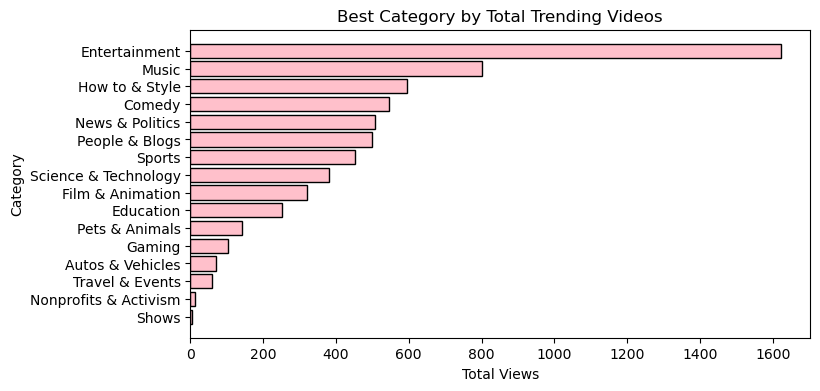

In [50]:
plt.figure(figsize=(8,4))
plt.barh(best_category_by_total_videos_trending['category_name'],best_category_by_total_videos_trending['video_id'],color='pink',edgecolor='black')
plt.title('Best Category by Total Trending Videos')
plt.ylabel('Category')
plt.xlabel('Total Views')
plt.show()

Berikutnya kita akan melihat category apa yg paling banyak masuk ke dalam trending.

In [37]:
best_category_by_total_views=df.groupby('category_name',as_index=False)['views'].sum().sort_values('views')
best_category_by_total_views

,category_name,views
13,Shows,51501058
9,Nonprofits & Activism,168941392
15,Travel & Events,343100609
0,Autos & Vehicles,520690717
11,Pets & Animals,764651989
2,Education,1180175828
8,News & Politics,1473090484
5,Gaming,2127799781
12,Science & Technology,3473462753
6,How to & Style,4071011870


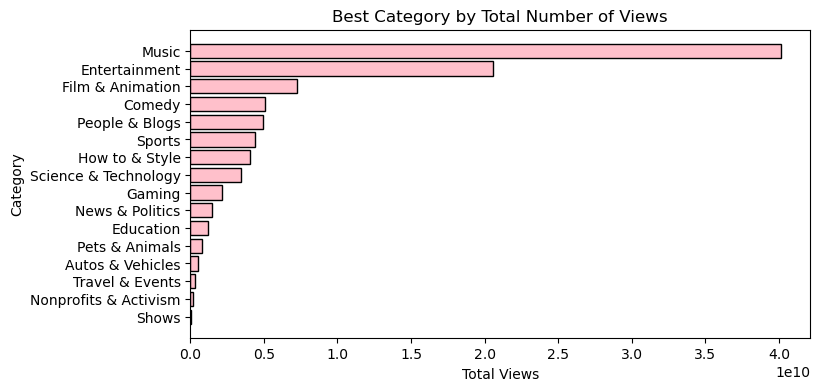

In [38]:
plt.figure(figsize=(8,4))
plt.barh(best_category_by_total_views['category_name'],best_category_by_total_views['views'],color='pink',edgecolor='black')
plt.title('Best Category by Total Number of Views')
plt.ylabel('Category')
plt.xlabel('Total Views')
plt.show()

Bisa kita lihat bahwa kategori **Music** dan **Entertaintment** adalah 2 kategori yang paling unggul dalam meng-generate video trending. Sekarang kita akan meilhat channel-channel yg bergerak di category-category tersebut dan channel-channel yang paling aktif dalam membuat video tersbut.

In [39]:
best_channel_for_music=df[df['category_name']=='Music'].groupby('channel_title',as_index=False)['views'].sum().sort_values('views').tail(10)
best_channel_for_music

,channel_title,views
68,Cardi B,896558471
338,TaylorSwiftVEVO,1010955662
110,Ed Sheeran,1032288961
62,CalvinHarrisVEVO,1042564430
35,BeckyGVEVO,1182971286
415,jypentertainment,1486972132
230,MalumaVEVO,1551515831
17,ArianaGrandeVevo,1576959172
407,ibighit,2235906679
74,ChildishGambinoVEVO,3758488765


In [40]:
best_channel_for_entertaintment=df[df['category_name']=='Entertainment'].groupby('channel_title',as_index=False)['views'].sum().sort_values('views').tail(10)
best_channel_for_entertaintment

,channel_title,views
360,The Action Lab,331542969
306,Rita Ora,371685481
324,Saturday Night Live,506752526
465,nigahiga,582326628
423,Warner Bros. Pictures,665142792
441,YouTube Spotlight,791388476
405,Universal Pictures,883707419
139,FoxStarHindi,1238609854
335,Sony Pictures Entertainment,1432374398
229,Marvel Entertainment,1806126076


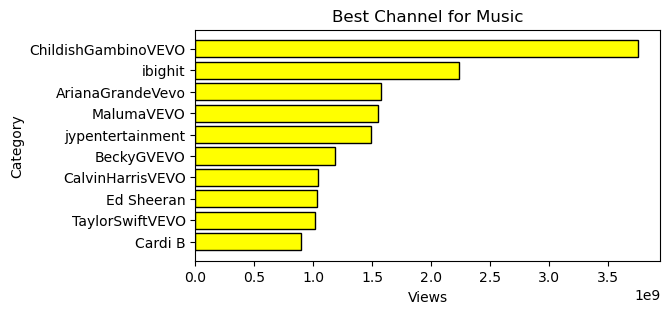

In [41]:
plt.figure(figsize=(6,3))
plt.barh(best_channel_for_music['channel_title'],best_channel_for_music['views'],color='yellow',edgecolor='black')
plt.title('Best Channel for Music')
plt.ylabel('Category')
plt.xlabel('Views')
plt.show()

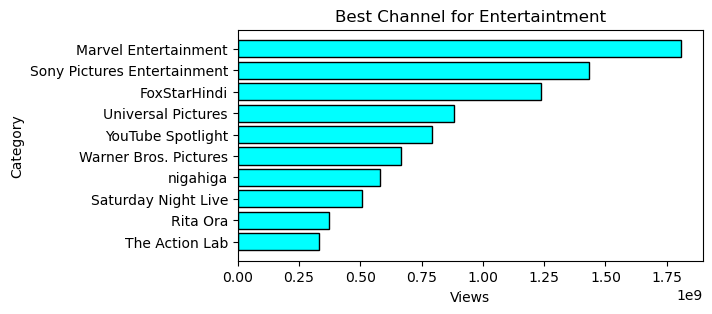

In [42]:
plt.figure(figsize=(6,3))
plt.barh(best_channel_for_entertaintment['channel_title'],best_channel_for_entertaintment['views'],color='cyan',edgecolor='black')
plt.title('Best Channel for Entertaintment')
plt.ylabel('Category')
plt.xlabel('Views')
plt.show()

Kita sudah dapatkan beberapa channel di bidang music dan entertaintment yang paling banyak diminati viewers. Kita bisa merekomendasikan perusahaan untuk mencoba menghubungi channel2 dan mempromosikan platform baru perusahaan agar channel2 tersebut bisa mempublish video-video mereka pada platform perusahaan.

In [43]:
most_active_channel_for_music=df[df['category_name']=='Music'].groupby('channel_title',as_index=False)['video_id'].nunique().sort_values('video_id').tail(10)
most_active_channel_for_music

,channel_title,video_id
321,SiaVEVO,7
415,jypentertainment,7
369,TroyeSivanVEVO,7
268,PTXofficial,8
42,Billboard,8
19,Atlantic Records,8
73,Charlie Puth,9
407,ibighit,9
306,SMTOWN,11
25,BBC Radio 1,15


In [44]:
most_active_channel_for_entertaintment=df[df['category_name']=='Entertainment'].groupby('channel_title',as_index=False)['video_id'].nunique().sort_values('video_id').tail(10)
most_active_channel_for_entertaintment

,channel_title,video_id
162,HellthyJunkFood,22
153,Good Mythical Morning,23
423,Warner Bros. Pictures,24
126,FBE,25
324,Saturday Night Live,35
368,The Late Late Show with James Corden,41
187,Jimmy Kimmel Live,48
369,The Late Show with Stephen Colbert,54
263,Netflix,58
387,TheEllenShow,74


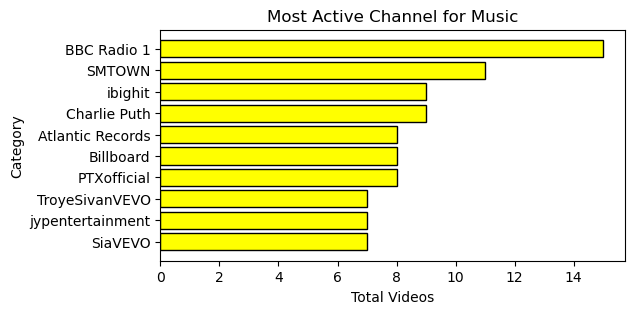

In [45]:
plt.figure(figsize=(6,3))
plt.barh(most_active_channel_for_music['channel_title'],most_active_channel_for_music['video_id'],color='yellow',edgecolor='black')
plt.title('Most Active Channel for Music')
plt.ylabel('Category')
plt.xlabel('Total Videos')
plt.show()

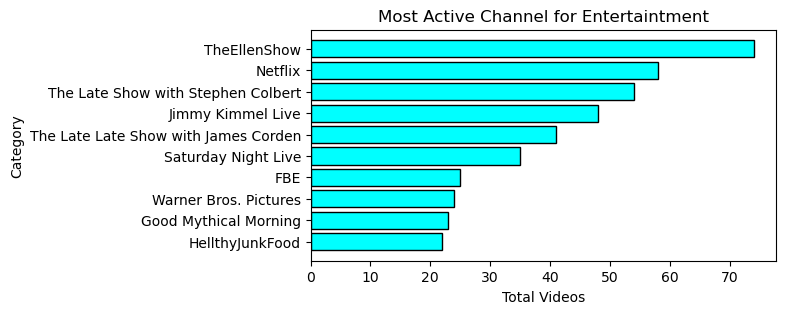

In [46]:
plt.figure(figsize=(6,3))
plt.barh(most_active_channel_for_entertaintment['channel_title'],most_active_channel_for_entertaintment['video_id'],color='cyan',edgecolor='black')
plt.title('Most Active Channel for Entertaintment')
plt.ylabel('Category')
plt.xlabel('Total Videos')
plt.show()

Demikian pula dengan channel2 yang paling aktif dalam memposting video2 mereka. Kita juga bisa merekomendasikan perusahaan untuk mencoba menghubungi channel2 ini dan mempromosikan platform baru perusahaan agar channel2 tersebut bisa mempublish video-video mereka pada platform perusahaan.

# Kesimpulan dan Rekomendasi 

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut tetang pertanyaan-pertanyaan dari peruhasan:
* Terdapat 5 faktor utama yg dapat menentukan apakah sebuah video termasuk dalam trending atau tidak yg ditetapkan oleh website YouTube itu sendiri, tetapi tidak dibatasi dari 5 faktor itu saja.
* Faktor-faktor ditentukan yaitu:
    * Banyaknya view terhadap video tersebut.
    * Seberapa cepat video tersebut mengumpulkan view.
    * Dari mana asal view tersebut.
    * Umur dari video tersebut.
    * Bagaimana performa video tersebut dibandingkan dgn video lain yg di publish oleh channel yg sama.
* Faktor lainnya dapat berupa limitation yang membatasi berapa kali sebuah video bisa masuk trending atau berapa banyak video yg dapat di featured sebagai trending dalam 1 hari.
* Pada platform YouTube, terdapat minumin requirement view dan speed sebuah video untuk masuk dalam ketegori trending, berdasarkan data yang kita terima, nilai minimum speed yg harus dicapai agar bisa masuk trending dan stay di trending adalah ±186 views per day. Kita bisa merekomendasikan untuk mengubah requirement tersebut menjadi lebih tinggi atau lebih rendah tergantung dari arah yang diinginkan perusahaan.
* Untuk faktor usia, berdasarkan data yang kita terima, usia maksimal sebuah video adalah 12 tahun, tetapi sulit bagi kita untuk menyimpulkan bahwa 12 tahun adalah nilai maksimalnya, karena jika requirement view dan speed nya masih terpenuhi, maka video tersebut masih bisa masuk trending.
* Untuk faktor-faktor dari mana asal view dan bagaimana performa video tersebut dibandingkan dengan video lainnya, kita membutuhkan data-data lebih detail terutama video-video yang tidak termasuk dalam kategori trending agar dapat kita compare dengan data video yang masuk trending.
* Category yg paling banyak masuk dalam kategori trending dan paling banyak diminati viewers adalah **music** dan **entertaintment**, sebagai action untuk menarik lebih banyak viewers pada platform baru perusahaan, kita bisa menarik perhatian channel-channel yang bergerak di bidang tersebut agar mereka bisa mempublish video-video mereka pada platform perusahaan.

In [47]:
df.to_csv('DataFrame.csv',index=False)